# Generalized Machine Learning 

In [27]:
%matplotlib inline 

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_context('notebook')
sns.set_style('whitegrid')

## The Machine Learning Problem

Given a set of $n$ samples of data such that each sample is represented by more than a single number, e.g. multivariate data that has several attributes or features, fit a model that is able to predict unknown properties of each sample. 

### Learning by Example

Given a bunch of examples (data) extract a meaningful pattern upon which to act.

![Learning from examples](figures/learning_from_ex.png)

### Types of Algorithms

Input _training_ data to fit a model which is then used to predict incoming inputs into ...

![Categorized by output type](figures/cat_by_output.png)

### Terminology

<dl style="margin-top:20px">
    <dt>Instance</dt>
        <dd>A single data point or example composed of multiple fields.<br/>Should be able to describe instances as a noun.</dd>
    <dt>Feature</dt>
        <dd>A numeric quantity describing an instance</dd>
    <dt>Target</dt>
        <dd>The property or field that we're trying to predict</dd>
    <dt>Dimension</dt>
        <dd>A semi-bounded region whose range describes all possible values of a feature</dd>
</dl>

## Regression

### Hypothesis

![regression](figures/regression.png)

Given continuous input data fit a function that is able to predict the continuous value of input given other data.

In [17]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

# Load Dataset 
boston = load_boston()

# Fit a model to the data and target 
model = RandomForestRegressor()
model.fit(boston.data, boston.target)

# Make predictions on the data
predicted = model.predict(boston.data)

print("Predicted Price = {:0.2f} for:".format(predicted[0]))
print("\n".join(["{}: {:0.3f}".format(k,v) for k, v in zip(boston.feature_names, boston.data[0])]))

Predicted Price = 25.91 for:
CRIM: 0.006
ZN: 18.000
INDUS: 2.310
CHAS: 0.000
NOX: 0.538
RM: 6.575
AGE: 65.200
DIS: 4.090
RAD: 1.000
TAX: 296.000
PTRATIO: 15.300
B: 396.900
LSTAT: 4.980


In [5]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

expected = boston.target
print("Random forest regression model on Boston housing dataset")
print("Mean squared error: {}".format(mse(expected, predicted)))
print("R2 score: {}".format(r2_score(expected, predicted)))

Random forest regression model on Boston housing dataset
Mean squared error: 1.5715924901185778
R2 score: 0.9813835494797991


## Classification

### Hypothesis

![classification](figures/classification.png)

Given labeled input data (with two or more labels), fit a function that can determine for any input, what the label is. 

In [25]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC


iris = load_iris()

model = SVC()
model.fit(iris.data, iris.target)

predicted = model.predict(iris.data)

print("Predicted Class = \"{}\" for:".format(iris.target_names[predicted[0]]))
print("\n".join(["{}: {:0.3f}".format(k,v) for k, v in zip(iris.feature_names, iris.data[0])]))

Predicted Class = "setosa" for:
sepal length (cm): 5.100
sepal width (cm): 3.500
petal length (cm): 1.400
petal width (cm): 0.200


In [21]:
from sklearn.metrics import classification_report

expected = iris.target

print("SVM Classifier on Iris dataset")
print(classification_report(expected, predicted, target_names=iris.target_names))

SVM Classifier on Iris dataset
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       1.00      0.96      0.98        50
  virginica       0.96      1.00      0.98        50

avg / total       0.99      0.99      0.99       150



## Clustering

### Hypothesis

![clustering](figures/clustering.png)

Given data, determine a pattern of associated data points or clusters via their similarity or distance from one another. 

In [43]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

cols = ["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]
data = pd.read_csv("data/customers.txt", usecols=cols)

pca = PCA(n_components=2)
reduced = pca.fit_transform(data)

model = KMeans(n_clusters=3)
model.fit(reduced)

centroids = model.cluster_centers_

In [44]:
from sklearn.metrics import silhouette_score


print("Silhouette score of KMeans (k=3) on the Customer dataset")
print(silhouette_score(reduced, labels))

Silhouette score of KMeans (k=3) on the Customer dataset
0.5233180004795728


In [45]:
# TODO: move to utils and import 
def draw_clusters(model=model, reduced=reduced):
    _, ax = plt.subplots(figsize=(9,6))
    centroids = model.cluster_centers_
    
    for i in range(centroids.shape[0]):
        datapoints = reduced[np.where(model.labels_==i)]
        
        ax.plot(datapoints[:,0],datapoints[:,1], '.')
        centers = ax.plot(centroids[:,0],centroids[:,1],'x')

        ax.setp(centroids,markersize=20.0)
        ax.setp(centroids,markeredgewidth=5.0)
    
    return ax 

AttributeError: 'AxesSubplot' object has no attribute 'setp'

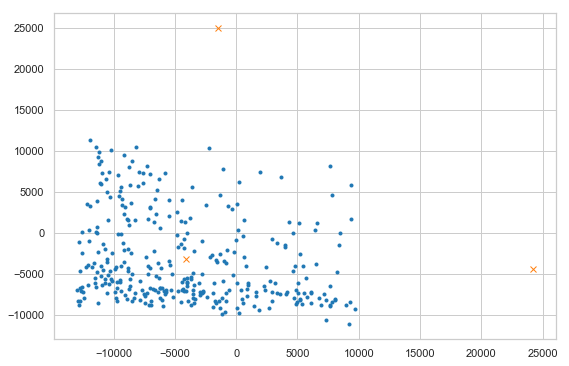

In [46]:
draw_clusters()

## Generalized Machine Learning

### Features

In order to do machine learning you need a data set containing instances (examples) that are composed of features from which you compose dimensions. 

**Instance**: a single data point or example composed of fields

**Feature**: a numeric quantity describing an instance 

**Dimension**: one or more attributes that describe a property

![feature space](figures/feature_space.png)

In [10]:
from sklearn.datasets import load_digits


digits = load_digits()

X = digits.data      # X.shape == (n_samples, n_features)
y = digits.target    # y.shape == (n_samples,)

Feature space refers to the n-dimensions where your variables live (not including a target variable or class). The term is used often in ML literature because in ML all variables are features (usually) and feature extraction is the art of creating a space with decision boundaries. 

**Target**
Y ≡ Thickness of car tires after some testing period

**Variables**
X1 ≡ distance travelled in test
X2 ≡ time duration of test
X3 ≡ amount of chemical C in tires

The feature space is R3, or more accurately, the positive quadrant in R3 as all the X variables can only be positive quantities. 

### Models

### Parameters and Hyperparameters

Domain knowledge about tires might suggest that the speed the vehicle was moving at is important, hence we generate another variable, X4 (this is the feature extraction part):

X4 = X1 / X2 ≡ the speed of the vehicle during testing.

This extends our old feature space into a new one, the positive part of R4.

A mapping is a function, ϕ, from R3 to R4:

ϕ(x1,x2,x3) = (x1,x2,x3,x1x2)

![mapping](figures/mapping.jpg)

### Feature Engineering

“feature engineering is another topic which doesn’t seem to merit any review papers or books, or even chapters in books, but it is absolutely vital to ML success... Much of the success of machine learning is actually success in engineering features that a learner can understand.” 

Scott Locklin, in “Neglected machine learning ideas”

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

Jason Brownlee, in “Discover Feature Engineering”

## Machine Learning API

![Choosing the Right Estimator](figures/choosing_estimator.png)

Object-oriented interface centered around the concept of an Estimator: 

“An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.”

Scikit-Learn Tutorial

### Estimators

 - `fit(X,y)` sets the state of the estimator.
 - `X` is usually a 2D `numpy` array of shape `(num_samples, num_features)`.
 - `y` is a 1D array with shape `(n_samples,)`
 - When can `y` be `None`?
 - `Fit` returns `self`. 


In [11]:
class Estimator(object):
    
    def get_params(self):
        """
        Returns a dictionary of all hyperparams 
        """
        pass 

    def set_params(self, **params):
        """
        Sets hyperparams on the instance 
        """
        pass 

    def fit(self, X, y=None, **kwargs):
        """
        Fit the estimator from data
        """
        # Modify state of self 
        return self

### Predictors

 - `predict(X)` returns the class or value
 - `X` is a 2D `numpy` array with shape `(n_rows, n_features)`
 - Returns a 1D vector with shape `(n_rows,)`
 - `predict_proba()` returns a 2D array of shape `(n_rows, n_classes)`

In [12]:
class Predictor(Estimator):
    
    def predict(self, X, **kwargs):
        """
        Predict values for each row in X 
        """
        return y_hat

```python
from sklearn import svm

estimator = svm.SVC(gamma=0.001)
estimator.fit(X, y)
estimator.predict(x)
```

### Models 

 - `score(X, y=None)` returns a descriptive metric between 0 and 1 where 0 is bad and 1 is good. 
 - `X` is a 2D `numpy` array with shape `(n_rows, n_features)`
 - `y` is optionally a 1D vector with "correct labels"

In [13]:
class Model(Predictor):
    
    def score(self, X, y=None, **kwargs):
        """
        Return a score between 0 and 1
        """
        return score

### Transformers

 - `transform(X)` transforms input data to prepare it for ML.
 - `X` is a 2D `numpy` array with shape `(n_rows, n_features)`
 - `X_prime` is a 2D `numpy` array with shape `(m_rows, m_features)`

In [14]:
class Transformer(Estimator):
    
    def transform(self, X, **kwargs):
        """
        Modifies X and returns a new X' 
        """
        return X_prime

### Data Preprocessing

Scikit-Learn provides a utility package, preprocessing to transform raw feature vectors into representations that assist downstream processing, including:

**Standardization**: transform data to mean = zero and unit variance. 
**Scaling**: transform feature to lie between range, usually `[0,1]`
**Normalization**: scaling features to a unit norm
**Binarization**: thresholding features to get binary values
**Label Encoding**: transforming labels to numeric values
**Imputation**: infer missing values from known parts of the data
**Data Reduction**: use unsupervised methods to reduce dimensionality.

### Pipelines

The purpose of the pipeline is to assemble several steps that can be cross-validated and operationalized together.

Sequentially applies a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement `fit()` and `transform()` methods. The final estimator only needs to implement `fit()`.

In [15]:
class Pipeline(Transformer):

    @property
    def named_steps(self):
        """
        Sequence of estimators
        """
        return self.steps

    @property
    def _final_estimator(self):
        """
        Terminating estimator
        """
        return self.steps[-1]


## Model Selection

Ok, I’ve fitted a model. How do I know if it’s any good?

### Model Selection Triple

![Model Selection Triple](figures/model_selection_triple.png)

### A Search Problem

### Visual Steering

## Complexity

### Underfitting

### Overfitting

### Cross-Validation

### Bias and Variance

### Sources of Complexity

### Interpretability

## Deployment

### Classification/Regression Workflow

### Clustering Workflow

### Data Product Pipeline

## Tour of Model Families

### Models: Instance Methods

Compare instances in data set with a similarity measure to find best matches. 

Suffers from curse of dimensionality. 

Focus on feature representation and similarity metrics between instances

 - k-Nearest Neighbors (kNN)
 - Self-Organizing Maps (SOM)
 - Learning Vector Quantization (LVQ)


### Regression Models

Model relationship of independent variables, X to dependent variable Y by iteratively optimizing error made in predictions.

 - Ordinary Least Squares
 - Logistic Regression
 - Stepwise Regression
 - Multivariate Adaptive Regression Splines (MARS)
 - Locally Estimated Scatterplot Smoothing (LOESS)


### Regularization Methods

Extend another method (usually regression), penalizing complexity (minimize overfit)

simple, popular, powerful 

better at generalization

 - Ridge Regression (L2)
 - LASSO (Least Absolute Shrinkage & Selection Operator) (L1)
 - Elastic Net (L1 + L2)


### Decision Trees

Model of decisions based on data attributes. Predictions are made by following forks in a tree structure until a decision is made. Used for classification & regression.

 - Classification and Regression Tree (CART)
 - Decision Stump
 - Random Forest
 - Multivariate Adaptive Regression Splines (MARS)
 - Gradient Boosting Machines (GBM)


### Bayesian Models

Explicitly apply Bayes’ Theorem for classification and regression tasks. Usually by fitting a probability function constructed via the chain rule and a naive simplification of Bayes.

 - Naive Bayes
 - Averaged One-Dependence Estimators (AODE)
 - Bayesian Belief Network (BBN)


### Kernel Methods

Map input data into higher dimensional vector space where the problem is easier to model. Named after the “kernel trick” which computes the inner product of images of pairs of data.

 - Support Vector Machines (SVM)
 - Radial Basis Function (RBF)
 - Linear Discriminant Analysis (LDA)


### Clustering Methods

Organize data into groups whose members share maximum similarity (defined usually by a distance metric). Two main approaches: centroids and hierarchical clustering.

 - k-Means
 - Affinity Propagation
 - OPTICS (Ordering Points to Identify Cluster Structure)
 - Agglomerative Clustering


### Artificial Neural Networks

Inspired by biological neural networks, ANNs are nonlinear function approximators that estimate functions with a large number of inputs.

System of interconnected neurons that activate 

Deep learning extends simple networks recursively

 - Perceptron
 - Back-Propagation
 - Hopfield Network
 - Restricted Boltzmann Machine (RBM)
 - Deep Neural Networks (DBN)


### Ensemble Models

Models composed of multiple weak models that are trained independently and whose outputs are combined to make an overall prediction.

 - Boosting
 - Bootstrapped Aggregation (Bagging)
 - AdaBoost
 - Stacked Generalization (blending)
 - Gradient Boosting Machines (GBM)
 - Random Forest


### Other Models

The list so far is no where near comprehensive, other algorithm and model classes include:

 - Conditional Random Fields (CRF)
 - Markovian Models (HMMs)
 - Dimensionality Reduction (PCA, PLS)
 - Rule Learning (Apriori, Brill)
 - More ...
